# Data exploration with pandas and sklearn

## The goal of this homework is to discover structure in an unlabeled dataset. The observations in this dataset belong to several different clusters. The specific goal is to identify how many clusters there are and to which cluster each point belongs.

## Question 1 (5 points). Load the dataset into a pandas dataframe. Each row represents a single observation; the values in the columns are numeric features recorded for that observation (in other words, this is a 'tidy' dataset). How many rows and columns are there? What is the dimension of this dataset? In other words, how many different features are there for each observation?

In [3]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd # these three lines import all the necessary packages for manipulating and graphing data
import os
os.chdir('homeworks/homework05') #these two lines of code ensure that we are working in the appropriate directory of the dev container


datafile = 'data/dataset.csv' #define your data
df = pd.read_csv(datafile) # import comma separated values into python using pandas
df #visualize the import
print('This dataset is 495 x 10. Put differently, there are 10 dimensions with 495 observations per dimension')



FileNotFoundError: [Errno 2] No such file or directory: 'homeworks/homework05'

## Question 2 (5 points). Make a scatter plot of `dim1` versus `dim2`, ie the first column versus the second one. How many clusters do you see in this plot?

The plot of dim1 by dim2 generates 3 clusters


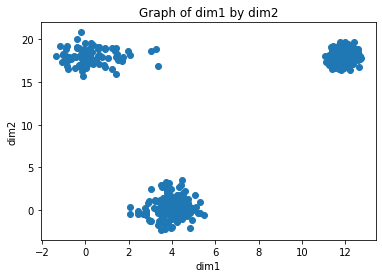

In [4]:
%matplotlib inline #ensures that the graphs are generated in line
plt.scatter(df['dim1'],df['dim2']) #creates a scatter plot with dimension 1 on the x and dimension 2 on the y axes
plt.title('Graph of dim1 by dim2') #rename the plot
plt.xlabel('dim1')
plt.ylabel('dim2') #rename the x and y axes, respectively
print('The plot of dim1 by dim2 generates 3 clusters') #Give it all a short description

## Question 3 (15 points). Perform principal components analysis (PCA) on the dataset, following along with the example in the lectures10and11 notebook. What fraction of the variation in the dataset is captured by the first two components? Make a plot of the first component against the second component. Now how many clusters do you see in the data? (2 points extra credit if you standardize the data first using `sklearn.preprocessing.StandardScaler`; see the lectures10and11 notebook for an example of how to do that.)

The fraction of the total variance explained by each component is: [0.71764809 0.14764088]
The total explained variance is : 0.8652889715229936


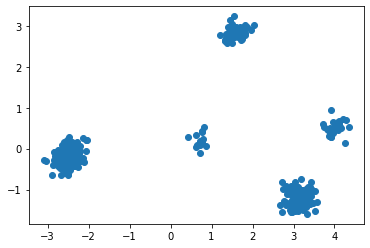

In [5]:

from sklearn.decomposition import PCA
from sklearn.preprocessing import StandardScaler #importing new functions, the first to do principal component analysis, the second to scale our data

scaler = StandardScaler() #define scaler
scaler.fit(df) #fit the now defined scaler to our data frame
df_scaled = scaler.transform(df) #apply the scaler to our data, outputting our scaled data

pca = PCA(n_components=10) #Define the number of principal components desired
pca.fit(df_scaled) #fit the pca to our data
print('The fraction of the total variance explained by each component is:', pca.explained_variance_ratio_) 
print('The total explained variance is :', np.sum(pca.explained_variance_ratio_))
df_pca=pca.transform(df_scaled) #apply the pca to our data, outputting our new data frame of manipulated data
plt.scatter(df_pca[:,0],df_pca[:,1]) #plot the 1st and 2nd principal components against eachother


## Question 4 (15 points). Use the KMeans clustering algorithm from scikit-learn to assign each point in the dataset to a cluster. Configure KMeans to find a number of clusters equal to the number that you identified visually in the PCA plot from question 3. What are the sizes of the different clusters (how many points are in each cluster)? Remake the PCA scatter plot (PC1 versus PC2) colored by the cluster labels.

In [2]:
from sklearn.cluster import KMeans #import the KMeans function

kmeans = KMeans(n_clusters= 5, random_state=10) #define the KMeans function, using the number of clusters we observed from our pca plot
kmeans.fit(df_pca) #fit the function to our data
y_kmeans = kmeans.predict(df_pca) #using KMeans, create a new data frame passed through the Kmeans function
cluster_to_color = {0:'green', 1:'orange', 2:'blue',3:'red',4:'pink'} #define the colors we will use for our graph
kmeans_colors = [] #create an empty list for a for loop
for cluster in y_kmeans: #Base the color of each point based on the cluster assignment generated by KMeans
    kmeans_colors.append(cluster_to_color[cluster])
kmeans_colors
plt.scatter(df_pca[:,0],df_pca[:,1],c=kmeans_colors) #plot the first 2 PCs against eachother, this time adding in the assigned colors

counting_colors = {} #generate an empty library for a for loop
for i in kmeans_colors: #sum up all the color assignments throughout kmeans_colors, setting equal to 1 if not found in library
    if i in counting_colors:
        counting_colors[i]+=1
    else:
        counting_colors[i]=1
print(f"The largest cluster of our plot contains {counting_colors['green']} points")
print(f"The second largest cluster of our plot contains {counting_colors['orange']} points")
print(f"The middlest cluster of our plot contains {counting_colors['blue']} points")
print(f"The second smallest cluster of our plot contains {counting_colors['pink']} points")
print(f"The smallest cluster of our plot contains {counting_colors['red']} points")




NameError: name 'df_pca' is not defined

## Question 5. (10 points) Make a 'scatter matrix' plot showing each column of the original dataset plotted against each of the other 9 columns in a big 10x10 array (like we did for the iris dataset in the lectures10and11 notebook). Notice how the number of apparent clusters in the data varies depends on which pairs of features are being plotted against one another. Color the plots using the kmeans clusters like you did in the previous question.
You could use `pd.plotting.scatter_matrix` or try importing seaborn (`import seaborn as sns`) and use `sns.pairplot`. Or (optional) try both and see which looks nicer. `sns.pairplot` has a `hue` argument that you can use for coloring by passing `hue='clusters'`. See the `pd.plotting.scatter_matrix` and `sns.pairplot` examples in the lectures10and11.ipynb jupyter notebook.

array([[<AxesSubplot:xlabel='dim1', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim2', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim3', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim4', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim5', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim6', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim7', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim8', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim9', ylabel='dim1'>,
        <AxesSubplot:xlabel='dim10', ylabel='dim1'>],
       [<AxesSubplot:xlabel='dim1', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim2', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim3', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim4', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim5', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim6', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim7', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim8', ylabel='dim2'>,
        <AxesSubplot:xlabel='dim9', ylabel='dim2'>,
        <A

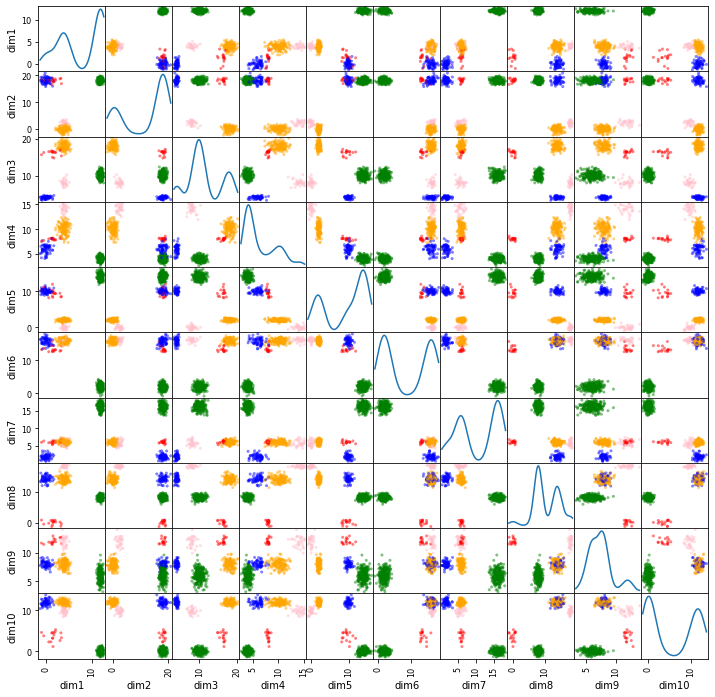

In [7]:
pd.plotting.scatter_matrix(df,diagonal='kde',figsize=(12,12),c=kmeans_colors) #generates a plot using panda of each of the dimensions of the data against eachother. On the diagonial is a kde representation of the data. Sized and color coded as appropriate.

In [ ]:
# and maybe also here if you are trying both and comparing...


## Question 5. (5 points of extra credit) Use the TSNE algorithm in scikit-learn to project the dataset down into 2 dimensions. How many clusters do you see in the TSNE scatter plot?

/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:795: FutureWarning: The default initialization in TSNE will change from 'random' to 'pca' in 1.2.
  warnings.warn(
/opt/conda/lib/python3.9/site-packages/sklearn/manifold/_t_sne.py:805: FutureWarning: The default learning rate in TSNE will change from 200.0 to 'auto' in 1.2.
  warnings.warn(


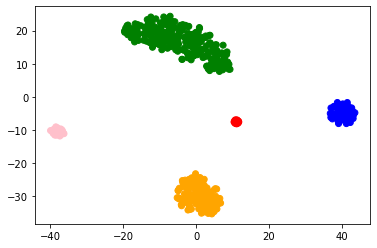

In [8]:
from sklearn.manifold import TSNE #import the TSNE function 
tsne = TSNE(n_components=10) #define the number of components to generate
df_tsne=tsne.fit_transform(df_scaled) #fit our TSNE function to our data AND apply it to generate the fitted data frame.
plt.scatter(df_tsne[:,0],df_tsne[:,1], c=kmeans_colors) #plot the first two PCs of our TSNE-fit data, again using the colors generated by KMeans

